In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances
import ipywidgets as widgets
from IPython.display import display

In [2]:
ic_cat = pd.read_csv("IC_cats.csv")
keywords2 = ic_cat.Cat.values.tolist()

In [9]:
#recode_project_keywords = pd.read_csv("updated_recode_project_keywords_20240917.csv")
recode_project_keywords = pd.read_excel("updated_recode_project_keywords_20240917.xlsx", header=1)

In [11]:
len(recode_project_keywords)

17

### use keywords to workout the Euclidean distance

In [12]:
df1 = pd.DataFrame([])
index_names = []
max_value = 0.0
for i in range(0,len(recode_project_keywords)):
    keywords1 = recode_project_keywords['keywords (LlaMA3-8B)'][i].replace("\n",",").split(",")
    combined_keywords = keywords1 + keywords2
    # Vectorize the keywords
    vectorizer = TfidfVectorizer().fit(combined_keywords)
    vectors1 = vectorizer.transform(keywords1).toarray()
    vectors2 = vectorizer.transform(keywords2).toarray()

    # Calculate Euclidean distance
    euclidean_dist = euclidean_distances(vectors1, vectors2)

    df = pd.DataFrame(euclidean_dist, index=keywords1, columns=keywords2)
    max_value = max(max_value, df.to_numpy().max())
    df_tmp = pd.DataFrame(df.min()).transpose()
    df1 = pd.concat([df1, df_tmp])
    index_names.append(recode_project_keywords['title'][i])
df1.index = index_names
# normalized df1 values to max_value
df2 = df1/max_value

### use text to workout the distance

In [128]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
from math import pi

# Sample text and keywords
text = recode_project_keywords['description'][0]
keywords = keywords2

# Vectorize the text and keywords
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([text] + keywords).toarray()

# Calculate Euclidean distances
distances = euclidean_distances(vectors[0].reshape(1, -1), vectors[1:]).flatten()

# Create a DataFrame for the radar chart
df = pd.DataFrame({
    'keywords': keywords,
    'distance': distances
})
print(df)
# # Radar chart setup
# categories = list(df['keywords'])
# N = len(categories)

# # What will be the angle of each axis in the plot? (we divide the plot / number of variables)
# angles = [n / float(N) * 2 * pi for n in range(N)]
# angles += angles[:1]

# # Initialise the spider plot
# fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# # Draw one axe per variable + add labels
# plt.xticks(angles[:-1], categories)

# # Draw ylabels
# ax.set_rlabel_position(0)
# plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
# plt.ylim(0, 1)

# # Plot data
# values = df['distance'].tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle='solid')

# # Fill area
# ax.fill(angles, values, 'b', alpha=0.1)

# plt.show()


                  keywords  distance
0              Engineering  1.414214
1                Computing  1.414214
2        Clinical Sciences  1.414214
3            Public Health  1.409315
4         Natural Sciences  1.408790
5  Business and Management  1.223028


In [129]:
print(df1.iloc[0])    

Engineering                1.414214
Computing                  1.414214
Clinical Sciences          1.414214
Public Health              1.414214
Natural Sciences           1.154737
Business and Management    1.223741
Name: Environmental Literature Analysis\nwith BERTopic & RoBERTa, dtype: float64


In [76]:
print(index_names)

['Environmental Literature Analysis\nwith BERTopic & RoBERTa', "Cracking Time's Code:\nSurvival Analysis of Large Datasets"]


In [74]:
df1.index = index_names
print(df1)

                                                    Engineering  Computing  \
Environmental Literature Analysis\nwith BERTopi...     1.414214   1.414214   
Cracking Time's Code:\nSurvival Analysis of Lar...     1.414214   1.414214   

                                                    Clinical Sciences  \
Environmental Literature Analysis\nwith BERTopi...           1.414214   
Cracking Time's Code:\nSurvival Analysis of Lar...           1.414214   

                                                    Public Health  \
Environmental Literature Analysis\nwith BERTopi...       1.414214   
Cracking Time's Code:\nSurvival Analysis of Lar...       1.414214   

                                                    Natural Sciences  \
Environmental Literature Analysis\nwith BERTopi...          1.154737   
Cracking Time's Code:\nSurvival Analysis of Lar...          1.414214   

                                                    Business and Management  
Environmental Literature Analysis\nwith BE

In [68]:
df1=pd.DataFrame(df1)
print(df1)

ValueError: Must pass 2-d input. shape=(2, 1, 6)

In [53]:
keywords1 = recode_project_keywords['keywords (LlaMA3-8B)'][0].replace("\n",",").split(",")
keywords1_2 = recode_project_keywords['keywords (LlaMA3-8B)'][1].replace("\n",",").split(",")

In [34]:
keywords1.dtype()

AttributeError: 'list' object has no attribute 'dtype'

In [36]:
keywords2 = ic_cat.Cat.values.tolist()

In [54]:
keywords2

['Engineering',
 'Computing',
 'Clinical Sciences',
 'Public Health',
 'Natural Sciences',
 'Business and Management']

In [38]:
combined_keywords = keywords1_2 + keywords2

In [55]:
# Vectorize the keywords
vectorizer = TfidfVectorizer().fit(combined_keywords)
vectors1 = vectorizer.transform(keywords1_2).toarray()
vectors2 = vectorizer.transform(keywords2).toarray()

# Calculate Euclidean distance
euclidean_dist = euclidean_distances(vectors1, vectors2)

df = pd.DataFrame(euclidean_dist, index=keywords1_2, columns=keywords2)

print(df)

                                      Engineering  Computing  \
1. Survival analysis                     1.414214   1.414214   
2. Time-to-event analysis                1.414214   1.414214   
3. Cox Proportional regression model     1.000000   1.000000   
4. Hazard ratio                          1.000000   1.000000   
5. Kaplan-Meier curve                    1.000000   1.000000   
6. Forest plot                           1.000000   1.000000   
7. Censoring                             1.000000   1.000000   
8. Data cleaning                         1.414214   1.414214   
9. Univariate analysis                   1.414214   1.414214   
10. Multivariate analysis                1.414214   1.414214   
11. Age-dependent associations           1.000000   1.000000   
12. Hazard risk                          1.000000   1.000000   
13. Median survival times                1.000000   1.000000   

                                      Clinical Sciences  Public Health  \
1. Survival analysis         

In [51]:
df1 = pd.DataFrame(df.min()).transpose()
print(df1)


   Engineering  Computing  Clinical Sciences  Public Health  Natural Sciences  \
0     1.414214   1.414214           1.414214       1.414214          1.154737   

   Business and Management  
0                 1.223741  


In [59]:
df2 = pd.DataFrame(df.min()).transpose()
df1 = pd.concat([df1, df2])
print(df1)


   Engineering  Computing  Clinical Sciences  Public Health  Natural Sciences  \
0     1.414214   1.414214           1.414214       1.414214          1.154737   
0     1.000000   1.000000           1.000000       1.000000          1.000000   

   Business and Management  
0                 1.223741  
0                 1.000000  


In [62]:
df1.index=[recode_project_keywords['title'][0], recode_project_keywords['title'][1]]
print(df1)

                                                    Engineering  Computing  \
Environmental Literature Analysis\nwith BERTopi...     1.414214   1.414214   
Cracking Time's Code:\nSurvival Analysis of Lar...     1.000000   1.000000   

                                                    Clinical Sciences  \
Environmental Literature Analysis\nwith BERTopi...           1.414214   
Cracking Time's Code:\nSurvival Analysis of Lar...           1.000000   

                                                    Public Health  \
Environmental Literature Analysis\nwith BERTopi...       1.414214   
Cracking Time's Code:\nSurvival Analysis of Lar...       1.000000   

                                                    Natural Sciences  \
Environmental Literature Analysis\nwith BERTopi...          1.154737   
Cracking Time's Code:\nSurvival Analysis of Lar...          1.000000   

                                                    Business and Management  
Environmental Literature Analysis\nwith BE

In [61]:
recode_project_keywords['title'][0]

'Environmental Literature Analysis\nwith BERTopic & RoBERTa'

### plot the radar chart

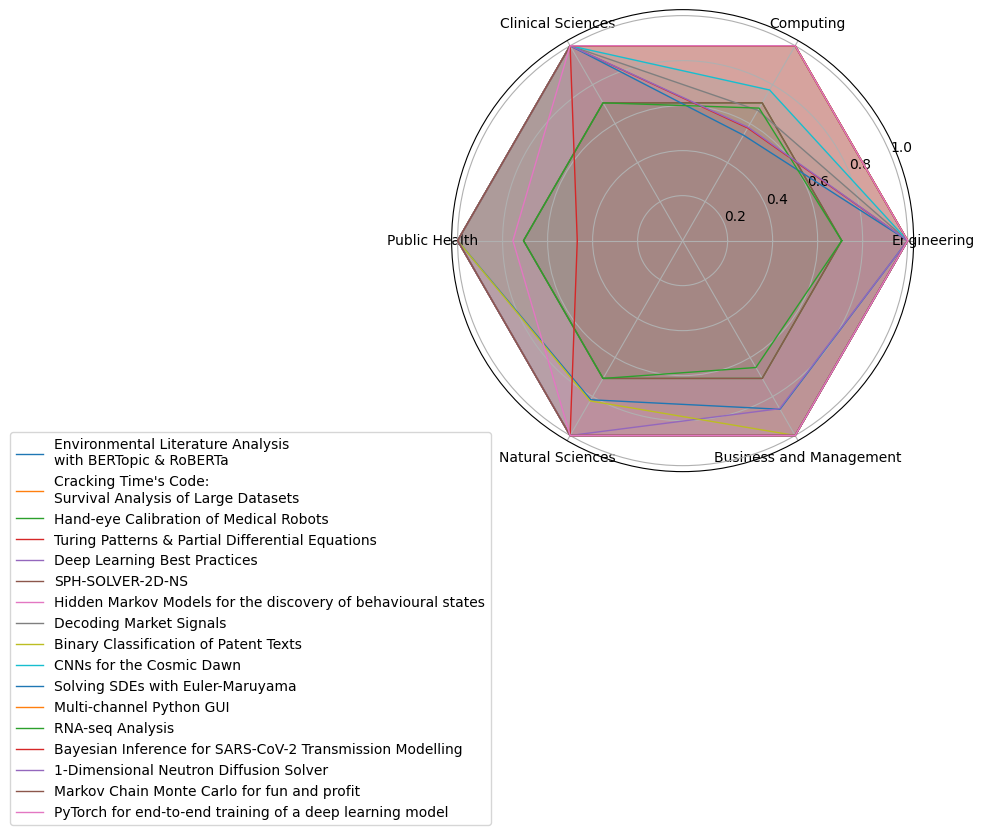

In [13]:
import matplotlib.pyplot as plt
from math import pi
# Function to plot radar chart
def plot_radar_chart(df):
    categories = list(df.columns)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variables)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Plot each row
    for i in range(len(df)):
        values = df.iloc[i].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=df.index[i])
        ax.fill(angles, values, alpha=0.1)

    # Add labels
    plt.xticks(angles[:-1], categories)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

plot_radar_chart(df2)


In [16]:
def plot_radar_chart_option(selection):
    df = pd.DataFrame(df2.loc[selection]).transpose()
    categories = list(df.columns)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variables)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Plot each row
    for i in range(len(df)):
        values = df.iloc[i].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=df.index[i])
        ax.fill(angles, values, alpha=0.1)

    # Add labels
    plt.xticks(angles[:-1], categories)
    plt.legend(loc='right', bbox_to_anchor=(0.1, 0.1))
    plt.show()


In [17]:
# Creating the dropdown widget, initial value set as NVIDIA to mitigate edge case of initially having no selection
dropdown = widgets.Dropdown(options=index_names, value=index_names[0], description='Select project:')

# Creating interactive functionality for users 
widgets.interactive(plot_radar_chart_option, selection=dropdown)

interactive(children=(Dropdown(description='Select project:', options=('Environmental Literature Analysis\nwit…

In [81]:
df1.loc[index_names[0]]

Engineering                1.414214
Computing                  1.414214
Clinical Sciences          1.414214
Public Health              1.414214
Natural Sciences           1.154737
Business and Management    1.223741
Name: Environmental Literature Analysis\nwith BERTopic & RoBERTa, dtype: float64

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances

# Example keyword sets
keywords1 = ["RNA-seq analysis", "pipeline", "biological data"]
keywords2 = ["mathematical model", "disease transmission", "real data", "Bayesian inference"]

# Combine the keyword sets
combined_keywords = keywords1 + keywords2

# Vectorize the keywords
vectorizer = TfidfVectorizer().fit(combined_keywords)
vectors1 = vectorizer.transform(keywords1).toarray()
vectors2 = vectorizer.transform(keywords2).toarray()

# Calculate Euclidean distance
euclidean_dist = euclidean_distances(vectors1, vectors2)
print(euclidean_dist)


[[1.41421356 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.08816487 1.41421356]]
